In [1]:
!pip install jupyter-summarytools -q

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from summarytools import dfSummary

from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = '/content/drive/MyDrive/0 Data Portfolio/Olist/orders.csv'

In [5]:
df = pd.read_csv(path)

/tmp/ipython-input-3280352130.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [6]:
df


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,EstimatedDeliveredDiff,AvgRanking,StimeDiConsegna,TempoConsegnaTot,TempoConsegnaTot (bins),GiornoAcquisto,giorno_settimana_ordine,Datediff_acquisto_approv,Datediff_approv_carrier,datediff_carrier_cliente
0,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,"2018-06-07 10:06:19,000","2018-06-09 03:13:12,000","2018-06-11 13:29:00,000","2018-06-19 12:05:52,000","2018-07-18 00:00:00,000",-29.0,5,41,12.0,12.0,gio,4,41,2.0,8.0
1,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,"2018-06-04 00:00:13,000","2018-06-05 00:35:10,000","2018-06-05 13:24:00,000","2018-06-16 15:20:55,000","2018-07-18 00:00:00,000",-32.0,1,44,12.0,12.0,lun,1,44,0.0,11.0
2,fb6ba131bbeb30fd6db9c8900b5c5b92,af5b08db5f1a31a3b6856a8a6dc33167,delivered,"2018-05-30 02:41:28,000","2018-05-30 03:24:11,000","2018-05-30 13:39:00,000","2018-06-22 22:41:09,000","2018-07-18 00:00:00,000",-26.0,5,49,23.0,20.0,mer,3,49,0.0,23.0
3,477ee3f21cb7374ecfa12433c30f53f5,384a027682b0ddc9d88f4aab723d9730,delivered,"2018-06-21 10:46:55,000","2018-06-21 11:01:15,000","2018-06-22 12:25:00,000","2018-06-26 17:07:43,000","2018-07-18 00:00:00,000",-22.0,4,27,5.0,4.0,gio,4,27,1.0,4.0
4,0d5cbb8e4c1c7a7fc26899126197a6b9,6ca4c791dfb84fbc05cbe68d7d7a95be,delivered,"2018-06-27 11:57:05,000","2018-06-27 12:08:25,000","2018-06-28 14:08:00,000","2018-07-05 15:18:47,000","2018-07-18 00:00:00,000",-13.0,4,21,8.0,8.0,mer,3,21,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,"2017-12-05 01:07:52,000",NaN,NaN,NaN,"2018-01-11 00:00:00,000",NaN,1,37,NaN,NaN,mar,2,37,NaN,NaN
99437,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,"2018-02-09 17:21:04,000",NaN,NaN,NaN,"2018-03-07 00:00:00,000",NaN,NaN,26,NaN,NaN,ven,5,26,NaN,NaN
99438,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,"2017-11-25 11:10:33,000",NaN,NaN,NaN,"2017-12-12 00:00:00,000",NaN,1,17,NaN,NaN,sab,6,17,NaN,NaN
99439,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,"2017-12-05 01:07:58,000",NaN,NaN,NaN,"2018-01-08 00:00:00,000",NaN,NaN,34,NaN,NaN,mar,2,34,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   customer_id                    99441 non-null  object 
 2   order_status                   99441 non-null  object 
 3   order_purchase_timestamp       99441 non-null  object 
 4   order_approved_at              99281 non-null  object 
 5   order_delivered_carrier_date   97658 non-null  object 
 6   order_delivered_customer_date  96476 non-null  object 
 7   order_estimated_delivery_date  99441 non-null  object 
 8   EstimatedDeliveredDiff         96476 non-null  float64
 9   AvgRanking                     98673 non-null  object 
 10  StimeDiConsegna                99441 non-null  int64  
 11  TempoConsegnaTot               96476 non-null  float64
 12  TempoConsegnaTot (bins)        96476 non-null 

In [8]:
df_logist = df[['order_id', 'AvgRanking', 'Datediff_acquisto_approv', 'Datediff_approv_carrier', 'datediff_carrier_cliente', 'StimeDiConsegna', 'TempoConsegnaTot']]

In [9]:
df_logist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  99441 non-null  object 
 1   AvgRanking                98673 non-null  object 
 2   Datediff_acquisto_approv  99441 non-null  int64  
 3   Datediff_approv_carrier   97644 non-null  float64
 4   datediff_carrier_cliente  96475 non-null  float64
 5   StimeDiConsegna           99441 non-null  int64  
 6   TempoConsegnaTot          96476 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 5.3+ MB


In [10]:
df_logist = df_logist.dropna(subset = ['TempoConsegnaTot', 'Datediff_approv_carrier', 'datediff_carrier_cliente'])

In [11]:
df_logist

,order_id,AvgRanking,Datediff_acquisto_approv,Datediff_approv_carrier,datediff_carrier_cliente,StimeDiConsegna,TempoConsegnaTot
0,82566a660a982b15fb86e904c8d32918,5,41,2.0,8.0,41,12.0
1,acce194856392f074dbf9dada14d8d82,1,44,0.0,11.0,44,12.0
2,fb6ba131bbeb30fd6db9c8900b5c5b92,5,49,0.0,23.0,49,23.0
3,477ee3f21cb7374ecfa12433c30f53f5,4,27,1.0,4.0,27,5.0
4,0d5cbb8e4c1c7a7fc26899126197a6b9,4,21,1.0,7.0,21,8.0
...,...,...,...,...,...,...,...
96479,dabf2b0e35b423f94618bf965fcb7514,5,52,4.0,3.0,52,7.0
96480,770d331c84e5b214bd9dc70a10b829d0,1,53,4.0,3.0,53,7.0
96481,8beb59392e21af5eb9547ae1a9938d06,1,53,5.0,5.0,53,11.0
96482,65d1e226dfaeb8cdc42f665422522d14,1,53,21.0,14.0,53,36.0


In [12]:
df_logist.isnull().sum()


,0
order_id,0
AvgRanking,646
Datediff_acquisto_approv,0
Datediff_approv_carrier,0
datediff_carrier_cliente,0
StimeDiConsegna,0
TempoConsegnaTot,0


In [13]:
dfSummary(df_logist)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,order_id[object],1. 2c45c33d2f9cb8ff8b1c86cc28c11c2. 82566a660a982b15fb86e904c8d3293. acce194856392f074dbf9dada14d8d4. fb6ba131bbeb30fd6db9c8900b5c5b5. 477ee3f21cb7374ecfa12433c30f536. 0d5cbb8e4c1c7a7fc26899126197a67. 87afd3fd1ec1b984a228c772b5dd2a8. ad133696906f6a78826daa0911b7da9. 2feb60b66471f9985b3f06df1f360f10. 0300095becf10f9b2993706759522711. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)96,451 (100.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAy5JREFUeJzt3MGN02AURtHnKIJhY2tkKSVADymCLb3ThTcwrMKCHq4lc04F/+JKT5H8ZXm9XgOF29kP4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MrdlWb4ty/J29kO4vtvMfJ2Zz2c/hOtzRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzG1mfs7Mn7MfwvUt/sWIijNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyzigZsZERGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyziiZZWa+zMynsx/C9d33ff++ruv72Q/h+u7rur4/n8/f27Z9nP0Yrus4jrf7zMy2bR+Px+PX2Q/i2vxAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3Of+ff5x9kP4dqO43hb9n3/4eNJCj4LJ2NdRcYPBDJiIyM2MmIjIzYyYiMjNjJiIyM2Mn8BY+dLgsx6ZCoAAAAASUVORK5CYII="">",0(0.0%)
2,AvgRanking[object],"1. 52. 43. 14. 35. 26. nan7. 4,58. 2,59. 3,510. 1,511. other","56,689 (58.8%)18,864 (19.6%)9,316 (9.7%)7,915 (8.2%)2,915 (3.0%)646 (0.7%)53 (0.1%)30 (0.0%)23 (0.0%)8 (0.0%)2 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA/xJREFUeJzt3cFtG0cAhtFZgXDiCwmBgEtIelARLjZFsIj0IAjiIXZ8YQ52TrYBcWV+A2jfq2AgfN4xif2l5XK5DCjczT4A2yE2MmIjIzYyYiMjNjJiIyM2MmIjs4wx3o8x3s0+yEZ8uVwun2YfYpbd8Xj8uN/v72cfZAvO5/PTsix/bTW43X6/v394ePh0OBw+zz7MW/b8/Pz76XS6f3x8fDfG2GZsY4xxOBw+f/jw4Z/Zh9mA97MPMJMPCGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERmY3xtd3rWYf5K3zMx5jdz6fn06n0/3Y+LtWhfP5/DTG+DL7HLPYILQ2vUFY/MosKjOfbJv+V75F09ZVW18abdGUdZWl0TbNXFf59LsxvtQlIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjM2XwYvyxTdMGL1sff2yR18LJGLyQee2TzdOJF3vV4MVohWusHrwYrXCt1w5ejFZ4MV/qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkVk9eDFa4VqvGrwYrXANr4WTMXgh4wMCmbXXqOuTq61aV1lVscbV6yqrKtZau66yquJqPiCQERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRuXpdZVXFWqvWVVZVrOG1cDLWVWR+9mTz5OKX++HgxaCFW/hu8GLQwq38bPBi0MIv50tdMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2Mt8NXgxauJUfDl4MWrgFr4WTMXgh8/+TbXiScWu74/H4cYwxDFy4tbv9fn//bV219s9Awov4no2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyOy+LanGsKbixmwQyFhXkfF/NjJ3y7L8uSyLX7nAzd2NMf4YY/w2+yC8fa5RMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyd2OMv8cY/84+CG+fDQIZ1ygZsZExeCFj8ELGNUpGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxnXKBmxkREbGesqMtZVZFyjZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkrKvIWFeRcY2SERsZgxcyBi9kXKNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJBxjZIRGxmDFzIGL2Rco2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHGNkhEbGbGRERsZsZERGxmxkREbGbGRERuZ/wD6tT6lff1iNgAAAABJRU5ErkJggg=="">",646(0.7%)
3,Datediff_acquisto_approv[int64],Mean (sd) : 24.4 (8.8)min < med < max:3.0 < 24.0 < 156.0IQR (CV) : 10.0 (2.8),100 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBq

In [14]:
colonne_da_verificare = ['Datediff_approv_carrier', 'datediff_carrier_cliente']

mask = (df_logist[colonne_da_verificare] < 0).any(axis=1)
df_logist = df_logist[~mask]

In [15]:
df_logist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95767 entries, 0 to 96483
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  95767 non-null  object 
 1   AvgRanking                95125 non-null  object 
 2   Datediff_acquisto_approv  95767 non-null  int64  
 3   Datediff_approv_carrier   95767 non-null  float64
 4   datediff_carrier_cliente  95767 non-null  float64
 5   StimeDiConsegna           95767 non-null  int64  
 6   TempoConsegnaTot          95767 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 5.8+ MB


In [16]:
dfSummary(df_logist)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,order_id[object],1. 2c45c33d2f9cb8ff8b1c86cc28c11c2. 82566a660a982b15fb86e904c8d3293. acce194856392f074dbf9dada14d8d4. fb6ba131bbeb30fd6db9c8900b5c5b5. 477ee3f21cb7374ecfa12433c30f536. 0d5cbb8e4c1c7a7fc26899126197a67. 87afd3fd1ec1b984a228c772b5dd2a8. 6e0d2539e48e84296bae6290de41059. d2e9aead95751dd6bd0ce80e7d506c10. 0745fd0c5e5bd55f752798a152b1d011. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)95,757 (100.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAy5JREFUeJzt3MGN02AURtHnKIJhY2tkKSVADymCLb3ThTcwrMKCHq4lc04F/+JKT5H8ZXm9XgOF29kP4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MrdlWb4ty/J29kO4vtvMfJ2Zz2c/hOtzRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzG1mfs7Mn7MfwvUt/sWIijNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyzigZsZERGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyziiZZWa+zMynsx/C9d33ff++ruv72Q/h+u7rur4/n8/f27Z9nP0Yrus4jrf7zMy2bR+Px+PX2Q/i2vxAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3Of+ff5x9kP4dqO43hb9n3/4eNJCj4LJ2NdRcYPBDJiIyM2MmIjIzYyYiMjNjJiIyM2Mn8BY+dLgsx6ZCoAAAAASUVORK5CYII="">",0(0.0%)
2,AvgRanking[object],"1. 52. 43. 14. 35. 26. nan7. 4,58. 2,59. 3,510. 1,511. other","56,259 (58.7%)18,728 (19.6%)9,258 (9.7%)7,870 (8.2%)2,894 (3.0%)642 (0.7%)53 (0.1%)30 (0.0%)23 (0.0%)8 (0.0%)2 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA/xJREFUeJzt3cFtG0cAhtFZgXDiCwmBgEtIelARLjZFsIj0IAjiIXZ8YQ52TrYBcWV+A2jfq2AgfN4xif2l5XK5DCjczT4A2yE2MmIjIzYyYiMjNjJiIyM2MmIjs4wx3o8x3s0+yEZ8uVwun2YfYpbd8Xj8uN/v72cfZAvO5/PTsix/bTW43X6/v394ePh0OBw+zz7MW/b8/Pz76XS6f3x8fDfG2GZsY4xxOBw+f/jw4Z/Zh9mA97MPMJMPCGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERmY3xtd3rWYf5K3zMx5jdz6fn06n0/3Y+LtWhfP5/DTG+DL7HLPYILQ2vUFY/MosKjOfbJv+V75F09ZVW18abdGUdZWl0TbNXFf59LsxvtQlIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjM2XwYvyxTdMGL1sff2yR18LJGLyQee2TzdOJF3vV4MVohWusHrwYrXCt1w5ejFZ4MV/qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkVk9eDFa4VqvGrwYrXANr4WTMXgh4wMCmbXXqOuTq61aV1lVscbV6yqrKtZau66yquJqPiCQERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRuXpdZVXFWqvWVVZVrOG1cDLWVWR+9mTz5OKX++HgxaCFW/hu8GLQwq38bPBi0MIv50tdMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2Mt8NXgxauJUfDl4MWrgFr4WTMXgh8/+TbXiScWu74/H4cYwxDFy4tbv9fn//bV219s9Awov4no2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyOy+LanGsKbixmwQyFhXkfF/NjJ3y7L8uSyLX7nAzd2NMf4YY/w2+yC8fa5RMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyd2OMv8cY/84+CG+fDQIZ1ygZsZExeCFj8ELGNUpGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxnXKBmxkREbGesqMtZVZFyjZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkrKvIWFeRcY2SERsZgxcyBi9kXKNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJBxjZIRGxmDFzIGL2Rco2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHGNkhEbGbGRERsZsZERGxmxkREbGbGRERuZ/wD6tT6lff1iNgAAAABJRU5ErkJggg=="">",642(0.7%)
3,Datediff_acquisto_approv[int64],Mean (sd) : 24.4 (8.8)min < med < max:3.0 < 24.0 < 156.0IQR (CV) : 10.0 (2.8),99 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD

In [17]:
custom_params = {'axes.spines.right': False, 'axes.spines.top': False}
sns.set_theme(style='ticks', palette = 'hls', rc=custom_params)

Text(0.5, 0, 'Numero di giorni')

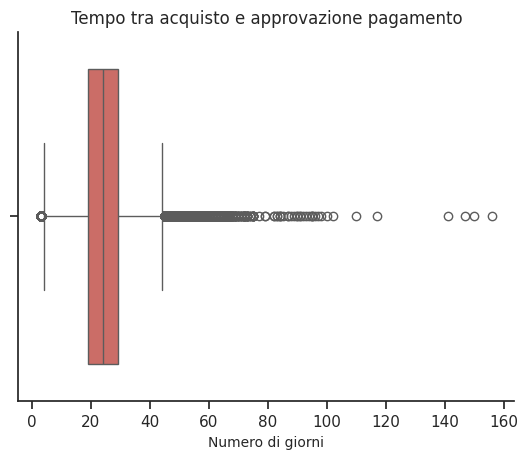

In [23]:
sns.boxplot(data = df_logist, x = 'Datediff_acquisto_approv')

plt.title("Tempo tra acquisto e approvazioned pagamento")
plt.xlabel("Numero di giorni", fontsize = 10)

In [27]:
df_logist['Datediff_acquisto_approv'].describe()


,Datediff_acquisto_approv
count,95767.000000
mean,24.378241
std,8.762936
min,3.000000
25%,19.000000
50%,24.000000
75%,29.000000
max,156.000000


Text(0.5, 0, 'Numero di giorni')

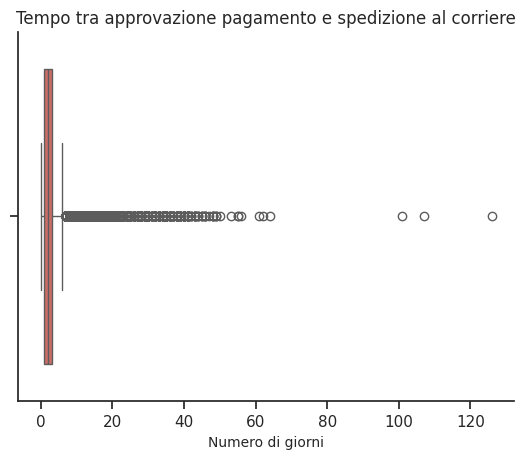

In [24]:
sns.boxplot(data = df_logist, x = 'Datediff_approv_carrier')

plt.title("Tempo tra approvazione pagamento e spedizione al corriere")
plt.xlabel("Numero di giorni", fontsize = 10)

In [28]:
df_logist['Datediff_approv_carrier'].describe()

,Datediff_approv_carrier
count,95767.000000
mean,2.731776
std,3.500706
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,126.000000


Text(0.5, 0, 'Numero di giorni')

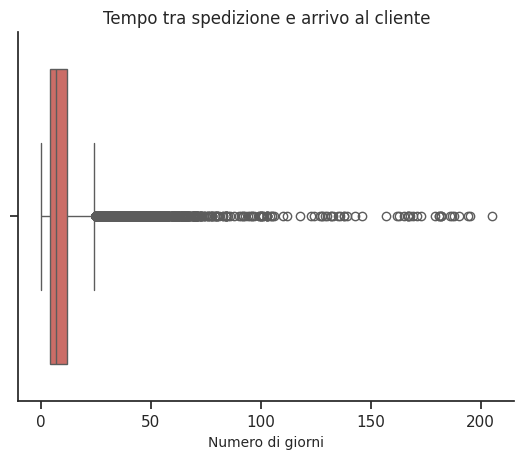

In [25]:
sns.boxplot(data = df_logist, x = 'datediff_carrier_cliente')

plt.title("Tempo tra spedizione e arrivo al cliente")
plt.xlabel("Numero di giorni", fontsize = 10)


In [29]:
df_logist['datediff_carrier_cliente'].describe()

,datediff_carrier_cliente
count,95767.000000
mean,9.299769
std,8.770102
min,0.000000
25%,4.000000
50%,7.000000
75%,12.000000
max,205.000000


Text(0.5, 0, 'Numero di giorni')

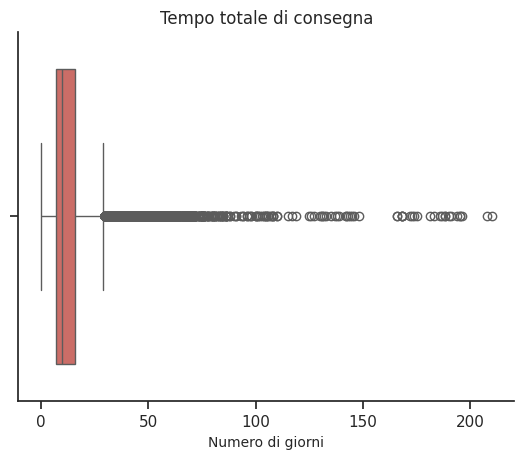

In [26]:
sns.boxplot(data = df_logist, x = 'TempoConsegnaTot')

plt.title("Tempo totale di consegna")
plt.xlabel("Numero di giorni", fontsize = 10)

In [30]:
df_logist['TempoConsegnaTot'].describe()

,TempoConsegnaTot
count,95767.000000
mean,12.524366
std,9.566489
min,0.000000
25%,7.000000
50%,10.000000
75%,16.000000
max,210.000000
